# test_parabola.ipynb

### Install

In [ ]:
pip install git+https://github.com/grmacchio/dynml.git

### Imports and Data Type Setting

In [2]:
from math import floor
from random import seed as seed

from matplotlib.pyplot import show, subplots
from torch import float64, manual_seed as torch_manual_seed, set_default_dtype
from torch.cuda import manual_seed as cuda_manual_seed

from dynml.dyn.cont.ode.firstorder.discretize import gen_approx_discrete_sys
from dynml.dyn.discrete.numsolve import gen_num_trajs
from dynml.examples.parabola import Parabola

In [3]:
seed(0)                                                                         # set the random seed
torch_manual_seed(0)                                                            # set the torch random seed
cuda_manual_seed(0)                                                             # set the cuda random seed

In [4]:
set_default_dtype(float64)                                                      # set the default data type

### Generate Trajectories

In [5]:
fos = Parabola()                                                                # initialize the dynamical system

dt = 0.01                                                                       # set the time step
dm = 'rk4'                                                                      # set the discretization method
discrete_sys = gen_approx_discrete_sys(fos, dt, dm)                             # generate the discrete system

num_traj = 10                                                                   # set the square root of the number of trajectories for plotting
t_final = 100.0                                                                 # set the final time
num_samples = floor(t_final/dt) + 1                                             # set the number of samples
trajs = gen_num_trajs(discrete_sys, fos.gen_ic, num_traj,                       # generate the trajectories
                      num_samples, compute='cpu', output='cpu', pbar=True)

100%|██████████| 10000/10000 [00:00<00:00, 11372.34it/s]


### Plot Trajectories

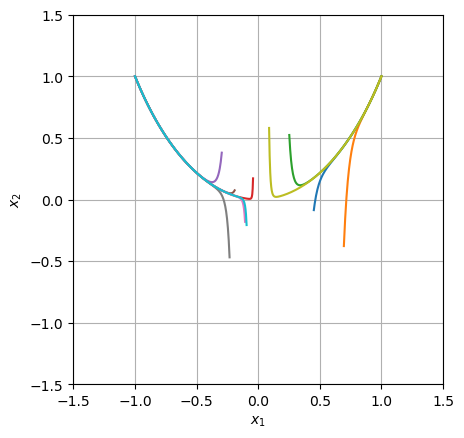

In [6]:
fig, ax = subplots(1, 1)                                                        # create a figure and axis
ax.plot(trajs[:, :, 0].T, trajs[:, :, 1].T)                                     # plot the trajectories
ax.set_aspect('equal')                                                          # set the aspect ratio to be equal
ax.set_xlim(-1.5, 1.5)                                                          # set the x-axis limits
ax.set_ylim(-1.5, 1.5)                                                          # set the y-axis limits
ax.set_xlabel('$x_1$')                                                          # set the x-axis label
ax.set_ylabel('$x_2$')                                                          # set the y-axis label
ax.grid()                                                                       # add a grid
show()                                                                          # show the plot